In [ ]:
root = "/content/drive/My Drive/FER/"
from imutils.face_utils import FaceAligner
from imutils.face_utils import rect_to_bb
import numpy as np
import imutils
import dlib
import cv2
from google.colab.patches import cv2_imshow

In [ ]:
#Face Aligner
"""
class FaceAligner:
    def __init__(self,predictor,desiredLeftEye=(0.35,0.35),desiredFaceWidth=48,desiredFaceHeight=None):
        self.predictor = predictor
        self.desiredLeftEye = desiredLeftEye
        self.desiredFaceWidth = desiredFaceWidth
        self.desiredFaceHeight = desiredFaceHeight
        
        if self.desiredFaceHeight is None:
            self.desiredFaceHeight = self.desiredFaceWidth
    
    def align(self,image,gray,rect):
        shape = self.predictor(gray,rect)
        shape = shape_to_np(shape)
        
        (lStart, lEnd) = FACIAL_LANDMARKS_IDXS["left_eye"]
        (rStart, rEnd) = FACIAL_LANDMARKS_IDXS["right_eye"]
        leftEyePts = shape[lStart:lEnd]
        rightEyePts = shape[rStart:rEnd]
        
        leftEyeCenter = leftEyePts.mean(axis=0).astype("int")
        rightEyeCenter = rightEyePts.mean(axis=0).astype("int")
        
        dY = rightEyeCenter[1] - leftEyeCenter[1]
        dX = rightEyeCenter[0] - leftEyeCenter[0]
        angle = np.degrees(np.arctan2(dY, dX)) - 180
        desiredRightEyeX = 1.0 - self.desiredLeftEye[0]
        
        dist = np.sqrt((dX ** 2) + (dY ** 2))
        desiredDist = (desiredRightEyeX - self.desiredLeftEye[0])
        desiredDist *= self.desiredFaceWidth
        scale = desiredDist / dist
        
        eyesCenter = ((leftEyeCenter[0] + rightEyeCenter[0]) // 2,(leftEyeCenter[1] + rightEyeCenter[1]) // 2)
        M = cv2.getRotationMatrix2D(eyesCenter, angle, scale)
        tX = self.desiredFaceWidth * 0.5
        tY = self.desiredFaceHeight * self.desiredLeftEye[1]
        M[0, 2] += (tX - eyesCenter[0])
        M[1, 2] += (tY - eyesCenter[1])
        
        (w, h) = (self.desiredFaceWidth, self.desiredFaceHeight)
        output = cv2.warpAffine(image, M, (w, h),flags=cv2.INTER_CUBIC)
        return output
"""


'\nclass FaceAligner:\n    def __init__(self,predictor,desiredLeftEye=(0.35,0.35),desiredFaceWidth=48,desiredFaceHeight=None):\n        self.predictor = predictor\n        self.desiredLeftEye = desiredLeftEye\n        self.desiredFaceWidth = desiredFaceWidth\n        self.desiredFaceHeight = desiredFaceHeight\n        \n        if self.desiredFaceHeight is None:\n            self.desiredFaceHeight = self.desiredFaceWidth\n    \n    def align(self,image,gray,rect):\n        shape = self.predictor(gray,rect)\n        shape = shape_to_np(shape)\n        \n        (lStart, lEnd) = FACIAL_LANDMARKS_IDXS["left_eye"]\n        (rStart, rEnd) = FACIAL_LANDMARKS_IDXS["right_eye"]\n        leftEyePts = shape[lStart:lEnd]\n        rightEyePts = shape[rStart:rEnd]\n        \n        leftEyeCenter = leftEyePts.mean(axis=0).astype("int")\n        rightEyeCenter = rightEyePts.mean(axis=0).astype("int")\n        \n        dY = rightEyeCenter[1] - leftEyeCenter[1]\n        dX = rightEyeCenter[0] - leftE

In [ ]:
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor(root+"Dataset/FER-2013/shape_predictor_68_face_landmarks.dat")
fa = FaceAligner(predictor, desiredFaceWidth=48)

In [ ]:
image = cv2.imread(root+"Dataset/FER-2013/Training_11204.jpg")
image = imutils.resize(image, width=100)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

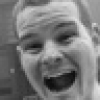

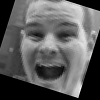

In [ ]:
cv2_imshow(image)
rects = detector(gray, 1)

print(" ")

#Passes through for loop if no face found 
for rect in rects:
	# extract the ROI of the *original* face, then align the face using facial landmarks
	(x, y, w, h) = rect_to_bb(rect)
	#faceOrig = imutils.resize(image[y:y+h, x:x+w], width=48)
	faceAligned = fa.align(image, gray, rect)
	#cv2_imshow(faceOrig)
	cv2_imshow(faceAligned)
	cv2.waitKey(0)


In [ ]:
rects

rectangles[[(6, 7) (96, 96)]]